In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
data = pd.read_csv('data\\FinalData.csv')

In [3]:
# Gradient Descent Function
def gradient_descent(m, b, points, L):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i].Total
        y = points.iloc[i].Final
        m_gradient += -(2/n) * x * (y - (m * x + b))
        b_gradient += -(2/n) * (y - (m * x + b))

    new_m = m - (L * m_gradient)
    new_b = b - (L * b_gradient)
    return new_m, new_b

In [4]:
# Ordinary Least Squares Function
def ols(m, b, points):
    n = len(points)
    x = points.Total
    y = points.Final
    m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    b = np.mean(y) - m * np.mean(x)
    return m, b

In [5]:
# Gradient Descent
L = .0001
epochs = 300
gd_m = 0
gd_b = 0
for i in range(epochs):
    if i % 100 == 0:
        print(f'Epoch {i}')
    gd_m, gd_b = gradient_descent(gd_m, gd_b, data, L)
print(f'Gradient Descent: m={gd_m}, b={gd_b}')

Epoch 0
Epoch 100
Epoch 200
Gradient Descent: m=0.9426590865188947, b=-0.015616755540369821


In [6]:
# Ordinary Least Square
ols_m, ols_b = ols(0, 0, data)
print(f'Ordinary Least Squares: m={ols_m}, b={ols_b}')

Ordinary Least Squares: m=1.0505199343812832, b=-8.622251938695982


In [7]:
# Initialize the Variables

# hw = input('Enter the homework average: ').replace(',', '.')
# proj = input('Enter the project average: ').replace(',', '.')
# quiz = input('Enter the quiz average: ').replace(',', '.')
# exam = input('Enter the exam grade: ').replace(',', '.')

hw = 100.0
proj = 100.0
quiz = 100.0
exam = 100.0

total = (hw * .15) + (proj * .15) + (quiz * .2) + (exam * .5)
# total = (hw + proj + quiz + exam) / 4

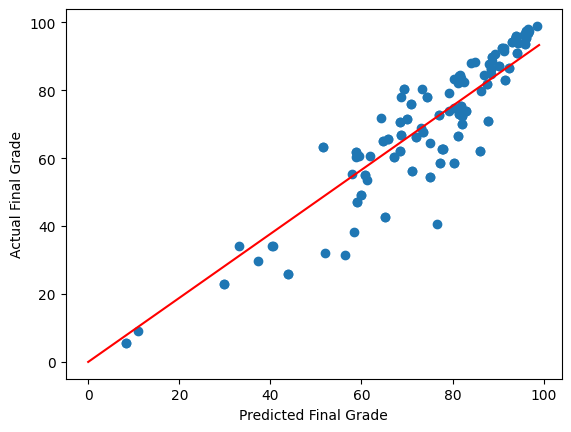

In [8]:
# Predict using Gradient Descent
gd_final = gd_m * total + gd_b

# Plot the data
plt.scatter(data.Total, data.Final)
plt.plot(list(range(0, 100)), [gd_m * x + gd_b for x in range(0, 100)], color='red')
plt.xlabel('Predicted Final Grade')
plt.ylabel('Actual Final Grade')
plt.show()

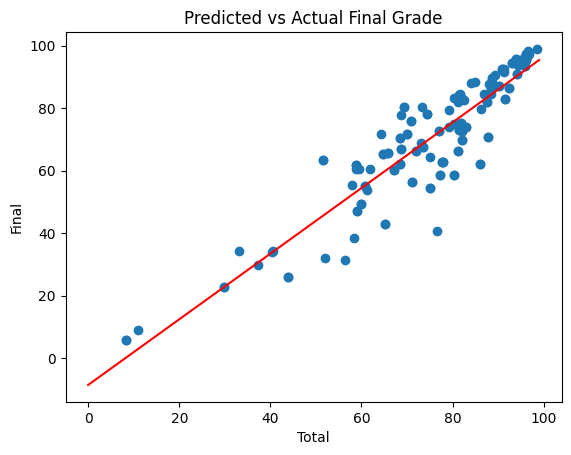

In [11]:
# Predict using Ordinary Least Squares
ols_final = ols_m * total + ols_b

# Plot the data
plt.scatter(data.Total, data.Final)
plt.plot(list(range(0, 100)), [ols_m * x + ols_b for x in range(0, 100)], color='red')
plt.xlabel('Total')
plt.ylabel('Final')
plt.title('Predicted vs Actual Final Grade')
plt.show()

In [10]:
# Convert to letter grade
grade = 'A' if gd_final >= 90 else 'B' if gd_final >= 80 else 'C' if gd_final >= 70 else 'D' if gd_final >= 60 else 'F'
print(f'\nPredicted Final using GD: {gd_final:.2f} ({grade})')

grade = 'A' if ols_final >= 90 else 'B' if ols_final >= 80 else 'C' if ols_final >= 70 else 'D' if ols_final >= 60 else 'F'
print(f'Predicted Final Using OLS: {ols_final:.2f} ({grade})')


Predicted Final using GD: 94.25 (A)
Predicted Final Using OLS: 96.43 (A)
